In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import import_ipynb
import data_preperation as dp
import internal_inconsistencies as ii


In [3]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ', 'Croatia': 'HR',  'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'UK'}

abbr_list=list(countries.values())

## 1.1 Get all the hourly load data of each country to a single dataframe

In [4]:
load_data=dp.load(countries)
display(load_data.head())

,Day,Month,Year,Time,AT,BE,BG,CH,CZ,HR,...,ME,NL,NO,PL,PT,RS,SE,SI,SK,UK
0,01,01,2019,00:00 - 01:00,6075.00,8973.25,4321.0,7037.0,5719.0,1836.0,...,418.0,11284.75,15724.0,15012.0,5030.0,5290.0,14597.0,1164.0,2835.0,27068.5
1,01,01,2019,01:00 - 02:00,5852.75,8542.75,4133.0,7096.0,5678.0,1732.0,...,404.0,11193.75,15623.0,14467.0,4797.0,5282.0,14375.0,1129.0,2744.0,27831.5
2,01,01,2019,02:00 - 03:00,5619.25,8077.50,3991.0,7244.0,5622.0,1623.0,...,376.0,10933.25,15705.0,13774.0,4650.0,5067.0,14153.0,1084.0,2679.0,27634.0
3,01,01,2019,03:00 - 04:00,5324.00,7823.25,3894.0,7443.0,5475.0,1534.0,...,349.0,10666.75,15643.0,13406.0,4394.0,4739.0,13896.0,1038.0,2608.0,25184.5
4,01,01,2019,04:00 - 05:00,5273.50,7636.25,3841.0,7353.0,5433.0,1488.0,...,331.0,10413.25,15612.0,13216.0,4177.0,4445.0,13955.0,1018.0,2602.0,22708.5


## 1.2 Get all the hourly generation data of each country from each source to a single dataframe

In [5]:
generation_data=dp.generation(countries)
display(generation_data.head())

,Day,Month,Year,Time,AT - Biomass,AT - Fossil Gas,AT - Fossil Hard coal,AT - Fossil Oil,AT - Geothermal,AT - Hydro Pumped Storage,...,UK - Fossil Oil,UK - Hydro Pumped Storage,UK - Hydro Pumped Storage,UK - Hydro Run-of-river and poundage,UK - Nuclear,UK - Other,UK - Solar,UK - Wind Offshore,UK - Wind Onshore,UK - Total
0,01,01,2019,00:00 - 01:00,304.0,1269.75,155.50,0.0,0.0,0.0,...,3.0,0.0,NaN,428.5,6941.5,66.0,0.0,3131.0,6527.5,25144.5
1,01,01,2019,01:00 - 02:00,304.0,935.25,154.75,0.0,0.0,0.0,...,0.0,52.5,NaN,404.0,6899.0,64.0,0.0,3198.0,6201.5,23967.5
2,01,01,2019,02:00 - 03:00,304.0,611.00,155.25,0.0,0.0,0.0,...,0.0,0.0,NaN,373.5,6830.5,63.0,0.0,3277.5,6095.0,23512.0
3,01,01,2019,03:00 - 04:00,304.0,568.00,155.25,0.0,0.0,0.0,...,0.0,0.0,NaN,349.0,6826.0,63.0,0.0,3158.0,5736.5,22352.5
4,01,01,2019,04:00 - 05:00,302.0,443.50,154.25,0.0,0.0,0.0,...,0.0,0.0,NaN,324.5,6818.0,64.0,0.0,2985.0,5357.0,21751.5


## 1.3 Get all the hourly cross-border transmission data of each country to a single dataframe

In [6]:
crossborder_data, transmission_data = dp.cross_border(abbr_list)

In [7]:
# display(transmission_data.head())

### 1.3.1 'cross_border_data' shows the net import/net export of the whole country in hourly timesteps

In [8]:
display(crossborder_data.head())

,Day,Month,Year,Time,AT,BE,BG,CH,CZ,HR,...,ME,NL,NO,PL,PT,RS,SE,SI,SK,UK
0,01,01,2019,00:00 - 01:00,-2494.0,-2718.0,908.0,-1799.0,2399.0,-662.0,...,-132.0,628.0,-4298.0,892.0,15.0,-1003.0,3378.0,-113.0,115.0,-677.0
1,01,01,2019,01:00 - 02:00,-2595.0,-2201.0,903.0,-2136.0,1853.0,-692.0,...,-122.0,444.0,-3447.0,277.0,-738.0,-1048.0,3255.0,4.0,243.0,-1521.0
2,01,01,2019,02:00 - 03:00,-2644.0,-1849.0,864.0,-2381.0,1468.0,-693.0,...,-88.0,531.0,-3416.0,28.0,-947.0,-958.0,3098.0,-31.0,181.0,-1824.0
3,01,01,2019,03:00 - 04:00,-2611.0,-2025.0,833.0,-2434.0,1010.0,-620.0,...,-55.0,710.0,-3815.0,5.0,-1381.0,-915.0,3367.0,14.0,230.0,-1727.0
4,01,01,2019,04:00 - 05:00,-2623.0,-2085.0,777.0,-2298.0,1056.0,-563.0,...,-35.0,720.0,-4122.0,52.0,-1984.0,-660.0,3522.0,6.0,83.0,-1180.0


## 2.1 Calculate net imports/ net exports of each country in each hour based on generation - load data of the country

In [9]:
import_export_using_load_gen=ii.import_export_using_load_gen(load_data,generation_data,abbr_list)
display(import_export_using_load_gen.head())

,Day,Month,Year,Time,AT - [gen - load],AT - import/export,BE - [gen - load],BE - import/export,BG - [gen - load],BG - import/export,...,RS - [gen - load],RS - import/export,SE - [gen - load],SE - import/export,SI - [gen - load],SI - import/export,SK - [gen - load],SK - import/export,UK - [gen - load],UK - import/export
0,01,01,2019,00:00 - 01:00,458.0,Net Export,-2747.25,Net Import,826.0,Net Export,...,-1561.0,Net Import,2855.0,Net Export,-100.0,Net Import,235.0,Net Export,-1924.0,Net Import
1,01,01,2019,01:00 - 02:00,329.5,Net Export,-2248.75,Net Import,815.0,Net Export,...,-1607.0,Net Import,2710.0,Net Export,18.0,Net Export,240.0,Net Export,-3864.0,Net Import
2,01,01,2019,02:00 - 03:00,-27.0,Net Import,-1874.50,Net Import,771.0,Net Export,...,-1512.0,Net Import,2672.0,Net Export,-17.0,Net Import,322.0,Net Export,-4122.0,Net Import
3,01,01,2019,03:00 - 04:00,418.0,Net Export,-1686.25,Net Import,851.0,Net Export,...,-1169.0,Net Import,2889.0,Net Export,28.0,Net Export,469.0,Net Export,-2832.0,Net Import
4,01,01,2019,04:00 - 05:00,319.5,Net Export,-1131.25,Net Import,888.0,Net Export,...,-835.0,Net Import,3055.0,Net Export,22.0,Net Export,472.0,Net Export,-957.0,Net Import


## 2.2 Calculate net imports/ net exports of each country in each hour based on cross-border transmission data of the country

In [10]:
import_export_using_crossborder_data=ii.import_export_using_crossborder(crossborder_data,abbr_list)
display(import_export_using_crossborder_data.head())

,Day,Month,Year,Time,AT - [exp - imp],AT - import/export,BE - [exp - imp],BE - import/export,BG - [exp - imp],BG - import/export,...,RS - [exp - imp],RS - import/export,SE - [exp - imp],SE - import/export,SI - [exp - imp],SI - import/export,SK - [exp - imp],SK - import/export,UK - [exp - imp],UK - import/export
0,01,01,2019,00:00 - 01:00,-2494.0,Net Import,-2718.0,Net Import,908.0,Net Export,...,-1003.0,Net Import,3378.0,Net Export,-113.0,Net Import,115.0,Net Export,-677.0,Net Import
1,01,01,2019,01:00 - 02:00,-2595.0,Net Import,-2201.0,Net Import,903.0,Net Export,...,-1048.0,Net Import,3255.0,Net Export,4.0,Net Export,243.0,Net Export,-1521.0,Net Import
2,01,01,2019,02:00 - 03:00,-2644.0,Net Import,-1849.0,Net Import,864.0,Net Export,...,-958.0,Net Import,3098.0,Net Export,-31.0,Net Import,181.0,Net Export,-1824.0,Net Import
3,01,01,2019,03:00 - 04:00,-2611.0,Net Import,-2025.0,Net Import,833.0,Net Export,...,-915.0,Net Import,3367.0,Net Export,14.0,Net Export,230.0,Net Export,-1727.0,Net Import
4,01,01,2019,04:00 - 05:00,-2623.0,Net Import,-2085.0,Net Import,777.0,Net Export,...,-660.0,Net Import,3522.0,Net Export,6.0,Net Export,83.0,Net Export,-1180.0,Net Import


## 2.3 Comparision of annual net imports/ net exports of each country based on generation/load & cross-border transmission data

,Country,Value based on (exp - imp)[GWh],Value based on (gen - load)[GWh],% difference with respect to Value based on (exp - imp) [%]
0,AT,-4415.246,-826.308500,81.29
1,BE,1738.555,3765.438750,-116.58
2,BG,5243.626,6351.229000,-21.12
3,CH,3242.657,-15694.028000,583.99
4,CZ,12706.690,15977.904000,-25.74
5,HR,-6133.652,-5807.991000,5.31
6,DE,34221.104,34750.114833,-1.55
7,DK,-5643.795,-4908.300000,13.03
8,EE,-2207.436,-2193.718000,0.62
9,ES,-6125.237,-426.022000,93.04


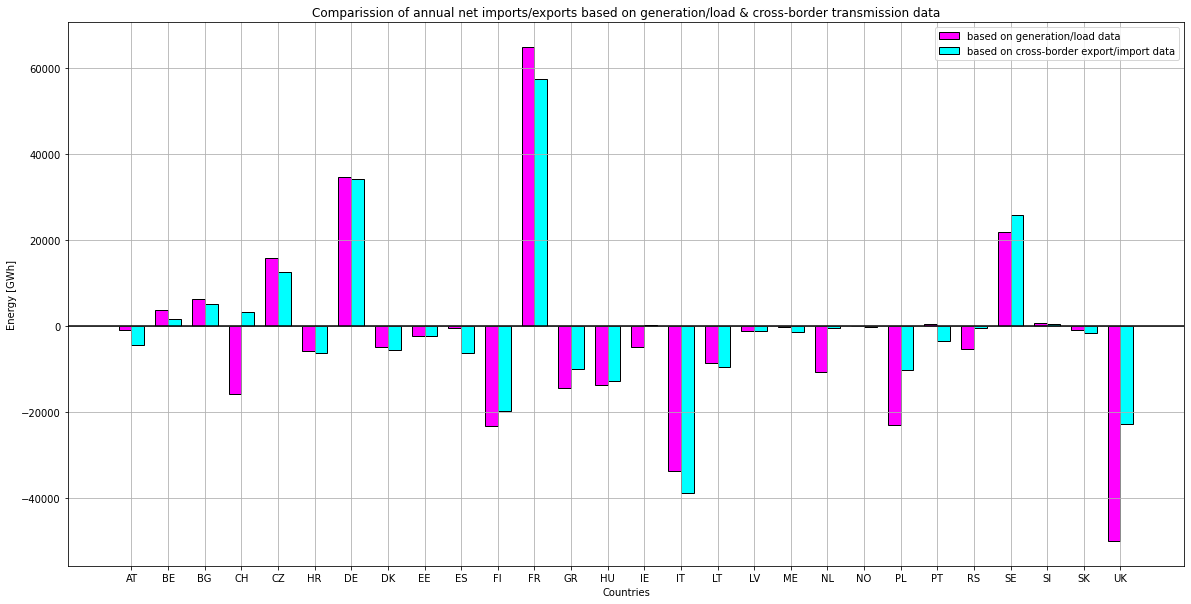

In [11]:
ii.entsoe_comparission_transmission_data(import_export_using_load_gen, import_export_using_crossborder_data, abbr_list)

## 3. Comparission of ENTSO-E data with other sources

## 3.1 Comparing ENTSO-E & Eurostat data

### 3.1.1 Comparing annual generation data of ENTSO-E & Eurostat data

,Country,Gen data based on ENTSO-E[GWh],Gen data based on Eurostat[GWh],% difference with respect to Value based on ENTSO-E [%]
0,AT,62259.034000,71101.13,-14.20
1,BE,88714.532000,89890.60,-1.33
2,BG,43849.061000,40346.14,7.99
3,CZ,82153.346000,80116.43,2.48
4,HR,12058.850000,12250.10,-1.59
5,DE,530285.454750,578863.00,-9.16
6,DK,28631.673000,28692.61,-0.21
7,EE,6033.263000,6600.10,-9.40
8,ES,249561.725000,263796.00,-5.70
9,FI,60156.643000,66045.00,-9.79


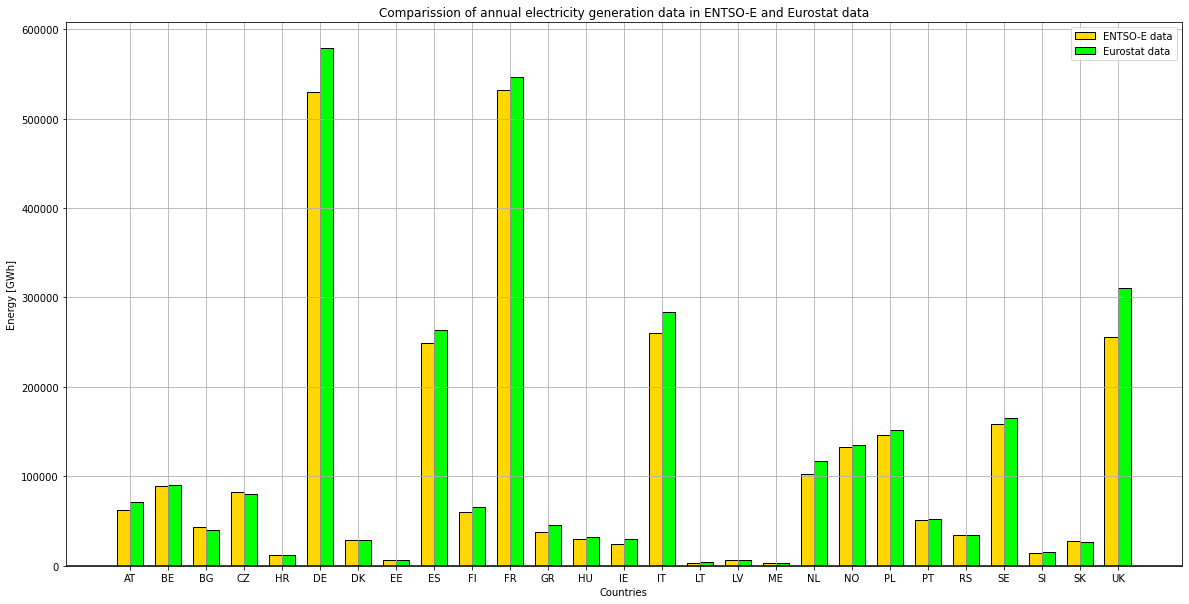

In [12]:
ii.eurostat_comparission_gen_data(generation_data,countries)

### 3.1.2 Comparing annual load data of ENTSO-E & Eurostat data

,Country,Load data based on ENTSO-E[GWh],Load data based on Eurostat[GWh],% difference with respect to Value based on ENTSO-E [%]
0,AT,63085.342500,66027.93,-4.66
1,BE,84949.093250,83708.90,1.46
2,BG,37497.832000,31600.21,15.73
3,CZ,66147.558000,60056.90,9.21
4,HR,17866.841000,16572.00,7.25
5,DE,495535.339917,510542.00,-3.03
6,DK,33539.973000,32442.27,3.27
7,EE,8226.981000,7786.94,5.35
8,ES,249987.747000,242165.00,3.13
9,FI,83439.920000,82980.00,0.55


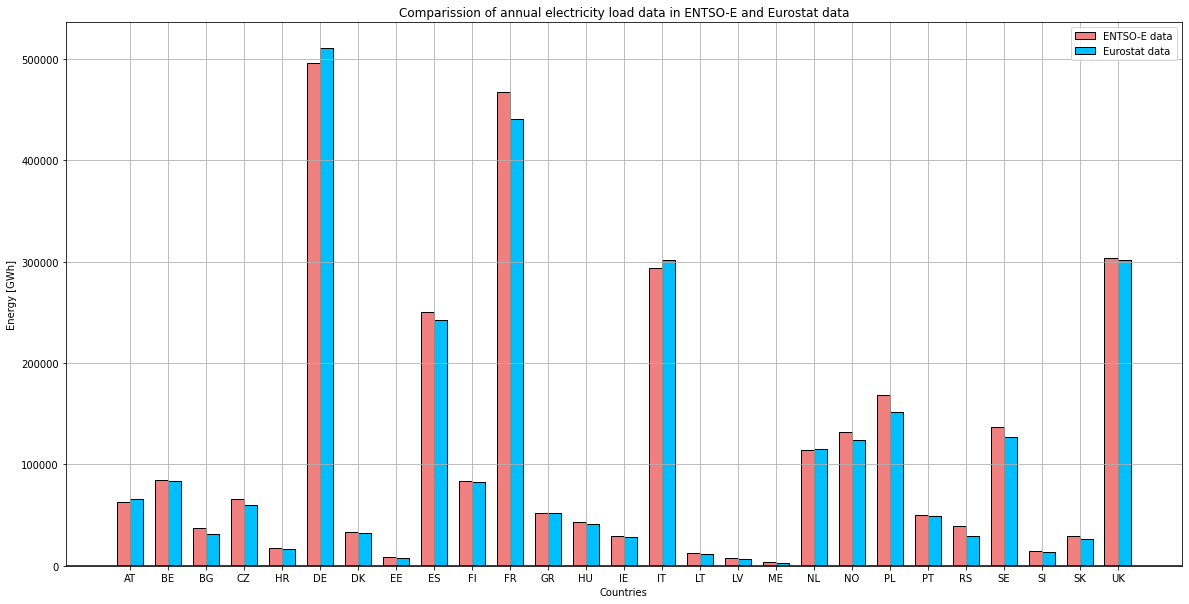

In [13]:
ii.eurostat_comparission_load_data(load_data, countries)


### 3.1.3 Comparing annual import/export data of ENTSO-E & Eurostat data

,Country,Net imports/exports data based on ENTSO-E[GWh],Net imports/exports data based on Eurostat[GWh],% difference with respect to Value based on ENTSO-E [%]
0,AT,-4415.246,-3128.59,29.14
1,BE,1738.555,1854.60,-6.67
2,BG,5243.626,5810.19,-10.80
3,CZ,12706.690,13096.61,-3.07
4,HR,-6133.652,-6133.00,0.01
5,DE,34221.104,32667.00,4.54
6,DK,-5643.795,-5810.86,-2.96
7,EE,-2207.436,-2157.00,2.28
8,ES,-6125.237,-6862.33,-12.03
9,FI,-19699.063,-20042.00,-1.74


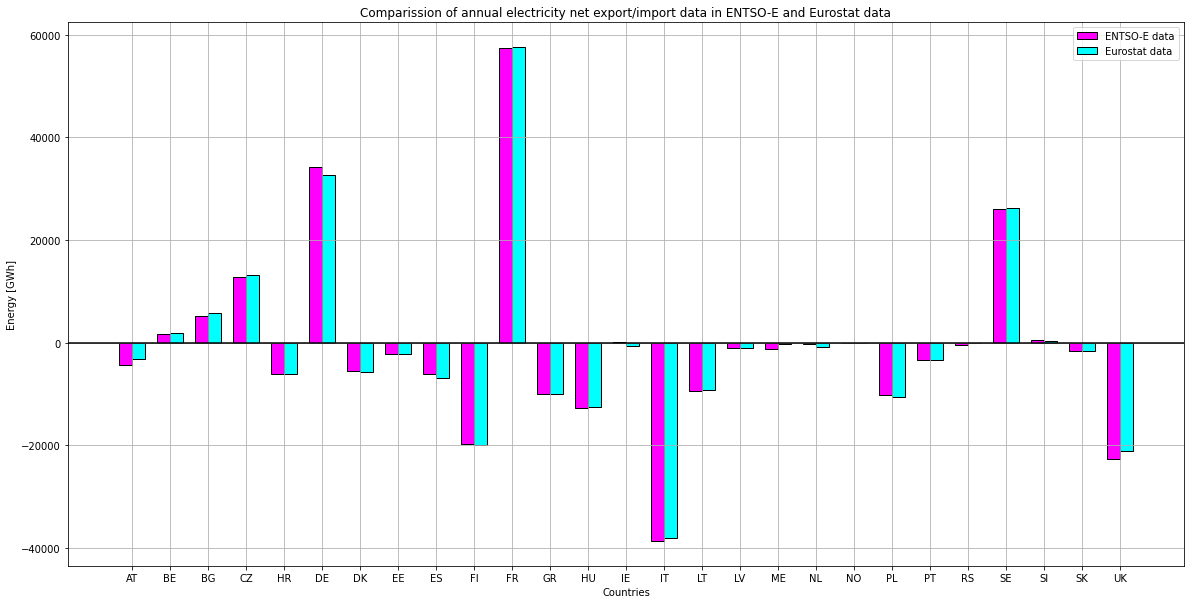

In [14]:
ii.eurostat_comparission_transmission_data(import_export_using_crossborder_data, countries)